This script contains the following:
1. Importing libraries and data
2. Data cleaning
3. Data prep for regression analysis
4. Regression analysis

# 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Eensure that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Import data

df = pd.read_pickle(r'/Users/joshd/Documents/Personal/CareerFoundry/Data Analytics Immersion/6/STI/02 Data/Prepared Data/STD Cases.pkl')

In [4]:
# Import data- totals with percent changes
df_percent = pd.read_pickle(r'/Users/joshd/Documents/Personal/CareerFoundry/Data Analytics Immersion/6/STI/02 Data/Prepared Data/totals.pkl')
df_percent

,State,Year,STD Cases,Population,Population Percent Change,STD Cases Percent Change,Rate per 100K,STD Cases Mean,STI Rates
0,Alabama,1996,21949.0,4331102.0,0.000000,0.000000,506.776335,29956.526316,No Change
1,Alabama,1997,21145.0,4367935.0,0.008504,-0.036630,484.096032,29956.526316,Decreasing
2,Alabama,1998,23076.0,4404701.0,0.008417,0.091322,523.894811,29956.526316,Increasing
3,Alabama,1999,23465.0,4430141.0,0.005776,0.016857,529.667114,29956.526316,Increasing
4,Alabama,2000,27509.0,4451975.0,0.004929,0.172342,617.905536,29956.526316,Increasing
...,...,...,...,...,...,...,...,...,...
964,Wyoming,2010,0.0,563626.0,0.035563,-1.000000,0.000000,825.684211,Decreasing
965,Wyoming,2011,0.0,568158.0,0.008041,0.000000,0.000000,825.684211,No Change
966,Wyoming,2012,2150.0,576412.0,0.014528,0.000000,372.997092,825.684211,No Change
967,Wyoming,2013,2072.0,523588.0,-0.091643,-0.036279,395.730995,825.684211,Decreasing


# 2. Data Cleaning

In [5]:
df_percent.columns

Index(['State', 'Year', 'STD Cases', 'Population', 'Population Percent Change',
       'STD Cases Percent Change', 'Rate per 100K', 'STD Cases Mean',
       'STI Rates'],
      dtype='object')

In [6]:
df_percent.head(100)

,State,Year,STD Cases,Population,Population Percent Change,STD Cases Percent Change,Rate per 100K,STD Cases Mean,STI Rates
0,Alabama,1996,21949.0,4331102.0,0.000000,0.000000,506.776335,29956.526316,No Change
1,Alabama,1997,21145.0,4367935.0,0.008504,-0.036630,484.096032,29956.526316,Decreasing
2,Alabama,1998,23076.0,4404701.0,0.008417,0.091322,523.894811,29956.526316,Increasing
3,Alabama,1999,23465.0,4430141.0,0.005776,0.016857,529.667114,29956.526316,Increasing
4,Alabama,2000,27509.0,4451975.0,0.004929,0.172342,617.905536,29956.526316,Increasing
...,...,...,...,...,...,...,...,...,...
95,Colorado,1996,9342.0,3919972.0,0.000000,0.000000,238.318029,18508.105263,No Change
96,Colorado,1997,10079.0,4018293.0,0.025082,0.078891,250.827901,18508.105263,Increasing
97,Colorado,1998,11156.0,4116639.0,0.024475,0.106856,270.997773,18508.105263,Increasing
98,Colorado,1999,13382.0,4226018.0,0.026570,0.199534,316.657430,18508.105263,Increasing


In [7]:
# look for any Nans, inf or outliers 
df_percent.fillna(value=0, inplace=True)

df_percent

,State,Year,STD Cases,Population,Population Percent Change,STD Cases Percent Change,Rate per 100K,STD Cases Mean,STI Rates
0,Alabama,1996,21949.0,4331102.0,0.000000,0.000000,506.776335,29956.526316,No Change
1,Alabama,1997,21145.0,4367935.0,0.008504,-0.036630,484.096032,29956.526316,Decreasing
2,Alabama,1998,23076.0,4404701.0,0.008417,0.091322,523.894811,29956.526316,Increasing
3,Alabama,1999,23465.0,4430141.0,0.005776,0.016857,529.667114,29956.526316,Increasing
4,Alabama,2000,27509.0,4451975.0,0.004929,0.172342,617.905536,29956.526316,Increasing
...,...,...,...,...,...,...,...,...,...
964,Wyoming,2010,0.0,563626.0,0.035563,-1.000000,0.000000,825.684211,Decreasing
965,Wyoming,2011,0.0,568158.0,0.008041,0.000000,0.000000,825.684211,No Change
966,Wyoming,2012,2150.0,576412.0,0.014528,0.000000,372.997092,825.684211,No Change
967,Wyoming,2013,2072.0,523588.0,-0.091643,-0.036279,395.730995,825.684211,Decreasing


/Users/joshd/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='STD Cases Percent Change', ylabel='Density'>

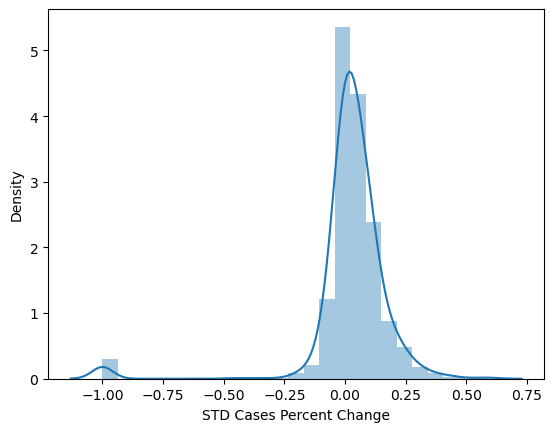

In [8]:
#check for extreme values
sns.distplot(df_percent['STD Cases Percent Change'], bins=25) # Shows extreme values

In [9]:
df_percent['STD Cases Percent Change'].mean() # Check the mean

0.026447295501873715

In [10]:
df_percent['STD Cases Percent Change'].median() # Check the median

0.029018789144050094

In [11]:
df_percent['STD Cases Percent Change'].max() # Check the max

0.5974678830757774

# Data Prep for Regression Analysis

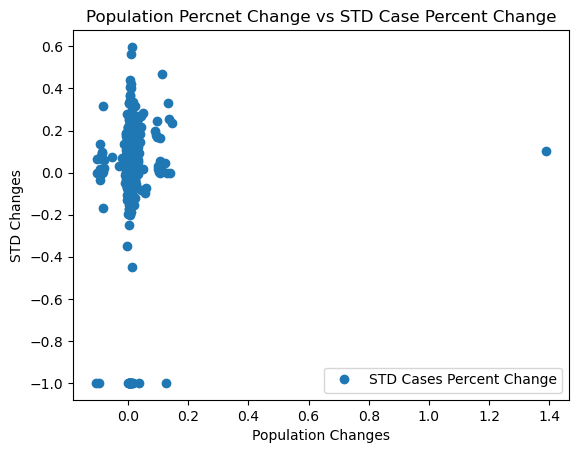

In [12]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_percent.plot(x='Population Percent Change', y='STD Cases Percent Change', style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Population Percnet Change vs STD Case Percent Change')
plt.legend(loc = 'lower right')
plt.xlabel('Population Changes')
plt.ylabel('STD Changes')
plt.show()

In [13]:
#Hypotheses:  The change in population will be correlated with STD cases.

In [14]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_percent['Population Percent Change'].values.reshape(-1,1)
y = df_percent['STD Cases Percent Change'].values.reshape(-1,1)

In [15]:
X

array([[ 0.00000000e+00],
       [ 8.50430214e-03],
       [ 8.41724980e-03],
       [ 5.77564743e-03],
       [ 4.92851130e-03],
       [ 3.80437896e-03],
       [ 3.93742370e-03],
       [ 3.17485225e-03],
       [ 6.53890728e-03],
       [ 6.09820974e-03],
       [ 9.04425987e-03],
       [ 6.26675625e-03],
       [ 7.35741060e-03],
       [ 1.00405414e-02],
       [ 1.50843926e-02],
       [ 4.81281811e-03],
       [ 4.01499977e-03],
       [ 2.42616014e-03],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 7.22843260e-03],
       [ 1.13611151e-02],
       [ 7.81859946e-03],
       [ 4.67205204e-03],
       [ 9.45040449e-03],
       [ 1.60282815e-02],
       [ 7.81936855e-03],
       [ 1.01954317e-02],
       [ 1.25504436e-02],
       [ 9.63142327e-03],
       [ 2.00357285e-02],
       [ 4.11864025e-03],
       [ 1.77475218e-02],
       [ 1.68338647e-02],
       [ 1.75816037e-02],
       [ 1.20807839e-02],
       [ 5.03521093e-03],
       [ 0.00000000e+00],
       [ 0.0

In [16]:
y

array([[ 0.00000000e+00],
       [-3.66303704e-02],
       [ 9.13218255e-02],
       [ 1.68573410e-02],
       [ 1.72341786e-01],
       [-6.03802392e-02],
       [ 1.16063138e-03],
       [-8.70237267e-02],
       [-8.21552527e-02],
       [ 2.30528015e-01],
       [ 2.70386749e-01],
       [ 7.43089767e-02],
       [-4.03371959e-02],
       [-3.16174998e-02],
       [ 4.10707954e-02],
       [ 1.06488051e-01],
       [ 2.87539117e-02],
       [-5.19360710e-02],
       [-3.09278351e-02],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 1.15039841e-01],
       [-2.23313979e-02],
       [-1.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 1.22932499e-02],
       [ 9.60476926e-02],
       [ 4.06929895e-02],
       [ 6.40727836e-02],
       [-1.03692923e-02],
       [-1.00000000e+00],
       [ 0.00000000e+00],
       [-7.77244688e-02],
       [-7.86266350e-02],
       [ 1.17115664e-01],
       [ 3.17689531e-02],
       [ 0.0

In [17]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 4. Regression Analysis

In [18]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [19]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [20]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

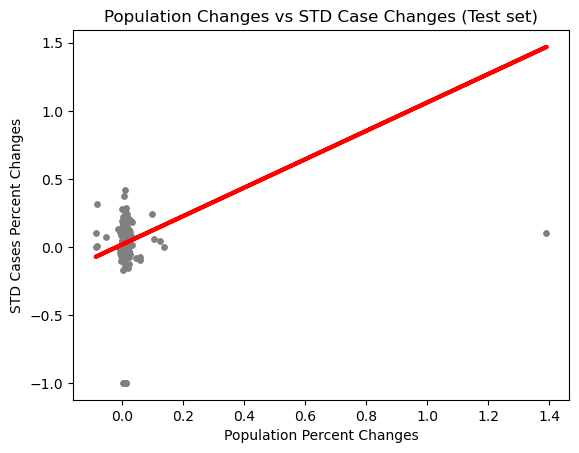

In [21]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Population Changes vs STD Case Changes (Test set)')
plot_test.xlabel('Population Percent Changes')
plot_test.ylabel('STD Cases Percent Changes')
plot_test.show()

In [22]:
# The line shows a correlation as population grows, the STDs grow too.  There are some outliers, but espeically with the lower values there is a higher correlation.

In [23]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [24]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.04377059]]
Mean squared error:  0.03270281439155494
R2 score:  -0.2658517307198578


In [25]:
y_predicted

array([[ 0.02534946],
       [ 0.02570143],
       [ 0.03386413],
       [ 0.01805385],
       [ 0.02857973],
       [ 0.0280806 ],
       [ 0.02836554],
       [ 0.03375173],
       [ 0.01811949],
       [ 0.1475929 ],
       [ 0.0224184 ],
       [ 0.03215758],
       [ 0.0258373 ],
       [ 0.03161312],
       [ 0.02986327],
       [ 0.021448  ],
       [ 0.0262025 ],
       [ 0.02366075],
       [ 0.03686403],
       [ 0.01811949],
       [ 0.02980534],
       [ 0.0254276 ],
       [ 0.0253329 ],
       [ 0.02429267],
       [ 0.02052299],
       [ 0.00308735],
       [-0.06809019],
       [ 0.02577113],
       [ 0.02762374],
       [ 0.01741968],
       [ 0.01966507],
       [ 0.02771495],
       [ 0.03834885],
       [ 0.07937067],
       [ 0.02343428],
       [ 0.02651223],
       [ 0.02378347],
       [ 0.01996226],
       [ 0.02747962],
       [ 0.01435045],
       [ 0.02623159],
       [ 0.01811949],
       [ 0.02362647],
       [ 0.02396306],
       [ 0.01467046],
       [ 0

In [26]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,-0.038269,0.025349
1,-0.075266,0.025701
2,0.041071,0.033864
3,0.003437,0.018054
4,0.091617,0.028580
5,0.420590,0.028081
6,-0.011655,0.028366
7,0.026468,0.033752
8,0.024370,0.018119
9,0.044510,0.147593


Compare how regression meets the training set

In [27]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [28]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [29]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.04377059]]
Mean squared error:  0.030971306499714767
R2 score:  0.01879323414962819


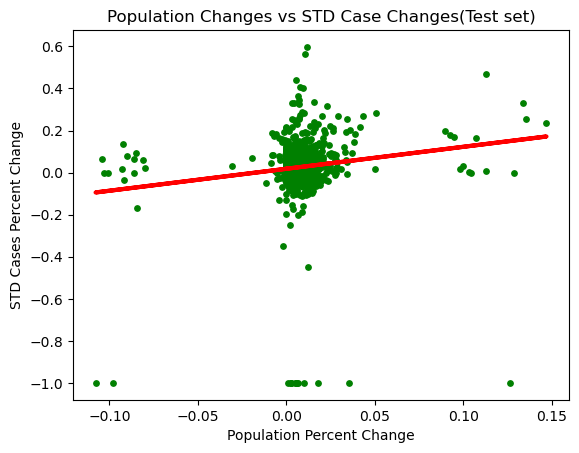

In [30]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Population Changes vs STD Case Changes(Test set)')
plot_test.xlabel('Population Percent Change')
plot_test.ylabel('STD Cases Percent Change')
plot_test.show()

In [31]:
# The R2 value is .02 so there is a very little correlation that STD cases continues to rise or fall at the same rate that population changes. There may be collection data bias as the diseases are all reported, but some may be missing which would impact the correlation. It appears that STD cases are rising more than the population changes.  